# CONTENTS

I.  ONE LANGUAGE TO BRING THEM ALL...ALL HANDS ON DECK

II. SCRAPING AWAY A LITTLE GLAMOUR

II. BRINGING IN SCIENCE


# II. SCRAPING AWAY A LITTLE GLAMOUR...WITH TAYLOR SWIFT

Taylor Swift's been hogging the news of late. Maybe we download a picture or of this living legend...say enliven our desktop ?Take a look : https://fortune.com/2022/11/10/why-are-concert-tickets-so-expensive-taylor-swift-springsteen/

# The usual : package imports...aka...why write code someone has already written ?

In [9]:

import urllib.request        #this one lets you connect to the website
import re                    #extracting paterns made easier...
import pandas as pd          #all things data wrangling
from bs4 import BeautifulSoup#Soup's for, well, scraping
import shutil                #Utilities


# Make a connection and bring in stuff through it...

In [7]:
# The basic unit of code is well, a function

def scrape_4_an_image(web_page_img, file_path, file_name):
    full_path = file_path + file_name + '.jpg'
    urllib.request.urlretrieve(web_page_img, full_path)

In [21]:
#Before we say action, a good idea to know where we are...

path = !pwd
path_s = path[0]+'/Workshop/'
path_s

'/Users/ram/Desktop/Workshop/'

In [23]:
#Start and action

web_page_img = input('URL to image goes here:')

file_name = input('Name of the image file is:')

scrape_4_an_image(web_page_img, path_s, file_name)
print("It's all done!")

URL to image goes here:https://content.fortune.com/wp-content/uploads/2022/11/GettyImages-1425749502-e1668005354764.jpg?w=1440&q=75
Name of the image file is:TaylorSwift
It's all done!


# III. Bring in the Science...Metabolism and the food you ate just now

The webpage you are interested in is :http://www.genome.jp/dbget-bin/www_bget?hsa00010 Let's go visit it and see what interests us

In [25]:
'''What did get ourselves into ?'''

my_page = urllib.request.urlopen('http://www.genome.jp/dbget-bin/www_bget?hsa00010')
my_page_text = str(my_page.read())
print(my_page_text)

b'<!doctype html>\n<html><head>\n<title>KEGG PATHWAY: hsa00010</title>\n<link type="text/css" rel="stylesheet" href="/css/gn2.css?1668117932">\n<link type="text/css" rel="stylesheet" href="/css/bget.css?1668117932">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link type="text/css" rel="stylesheet" href="/css/bgetm.css?1668117932" media="only screen and (max-width: 768px)">\n<style>.kcfd{display:none;}</style>\n<script>\n<!--\nvar getElementsByClassName = document.getElementsByClassName ?\n  function (cl){\n    return document.getElementsByClassName(cl);\n  } :\n  function (cl){\n    var elms = [];\n    var objs = document.getElementsByTagName(\'*\');\n    for(var i=0;i<objs.length;i++){\n      var obj = objs[i];\n      if(obj.className == cl){\n        elms.push(obj);\n      }\n    }\n    return elms;\n  };\nfunction toggleField(clk,cl,show,hide){\n  var objs = getElementsByClassName(cl);\n  for(var i=0;i<objs.length;i++){\n    var obj = objs[i];\n    if(!o

In [28]:
'''Wait, soup's up'''

soup = BeautifulSoup(my_page_text, 'html.parser')
print(soup.prettify())

b'
<!DOCTYPE html>
\n
<html>
 <head>
  \n
  <title>
   KEGG PATHWAY: hsa00010
  </title>
  \n
  <link href="/css/gn2.css?1668117932" rel="stylesheet" type="text/css"/>
  \n
  <link href="/css/bget.css?1668117932" rel="stylesheet" type="text/css"/>
  \n
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  \n
  <link href="/css/bgetm.css?1668117932" media="only screen and (max-width: 768px)" rel="stylesheet" type="text/css"/>
  \n
  <style>
   .kcfd{display:none;}
  </style>
  \n
  <script>
   \n<!--\nvar getElementsByClassName = document.getElementsByClassName ?\n  function (cl){\n    return document.getElementsByClassName(cl);\n  } :\n  function (cl){\n    var elms = [];\n    var objs = document.getElementsByTagName(\'*\');\n    for(var i=0;i<objs.length;i++){\n      var obj = objs[i];\n      if(obj.className == cl){\n        elms.push(obj);\n      }\n    }\n    return elms;\n  };\nfunction toggleField(clk,cl,show,hide){\n  var objs = getElementsByClassName(cl);\

In [29]:
'''Some of the Soup's flavors...'''

soup.title.string

'KEGG PATHWAY: hsa00010'

# How can you ever find anything in this haystack?

In [30]:
'''Can we find even one needle in a haystacks ?'''

my_pattern_1 = re.search("<td>(\w+);",my_page_text)
my_pattern_1

<re.Match object; span=(11507, 11515), match='<td>HK3;'>

In [31]:
'''Can we find multiple instances...'''

my_pattern = re.findall("<td>(\w+);",my_page_text)
print(my_pattern)
            
gene_table = pd.DataFrame()

gene_table['Gene symbol'] = my_pattern

print("KEGG scraping in progress")

gene_table

['HK3', 'HK1', 'HK2', 'HKDC1', 'GCK', 'GPI', 'PFKM', 'PFKP', 'PFKL', 'FBP1', 'FBP2', 'ALDOC', 'ALDOA', 'ALDOB', 'TPI1', 'GAPDH', 'GAPDHS', 'PGK2', 'PGK1', 'PGAM1', 'PGAM2', 'PGAM4', 'ENO3', 'ENO2', 'ENO1', 'ENO4', 'PKM', 'PKLR', 'PDHA2', 'PDHA1', 'PDHB', 'DLAT', 'DLD', 'LDHAL6A', 'LDHAL6B', 'LDHA', 'LDHB', 'LDHC', 'ADH1A', 'ADH1B', 'ADH1C', 'ADH7', 'ADH4', 'ADH5', 'ADH6', 'AKR1A1', 'ALDH2', 'ALDH3A2', 'ALDH1B1', 'ALDH7A1', 'ALDH9A1', 'ALDH3B1', 'ALDH3B2', 'ALDH3A1', 'ACSS1', 'ACSS2', 'GALM', 'PGM1', 'PGM2', 'G6PC1', 'G6PC2', 'G6PC3', 'ADPGK', 'BPGM', 'MINPP1', 'PCK1', 'PCK2']
KEGG scraping in progress


,Gene symbol
0,HK3
1,HK1
2,HK2
3,HKDC1
4,GCK
...,...
62,ADPGK
63,BPGM
64,MINPP1
65,PCK1


'''Where's the cheat sheet?'''
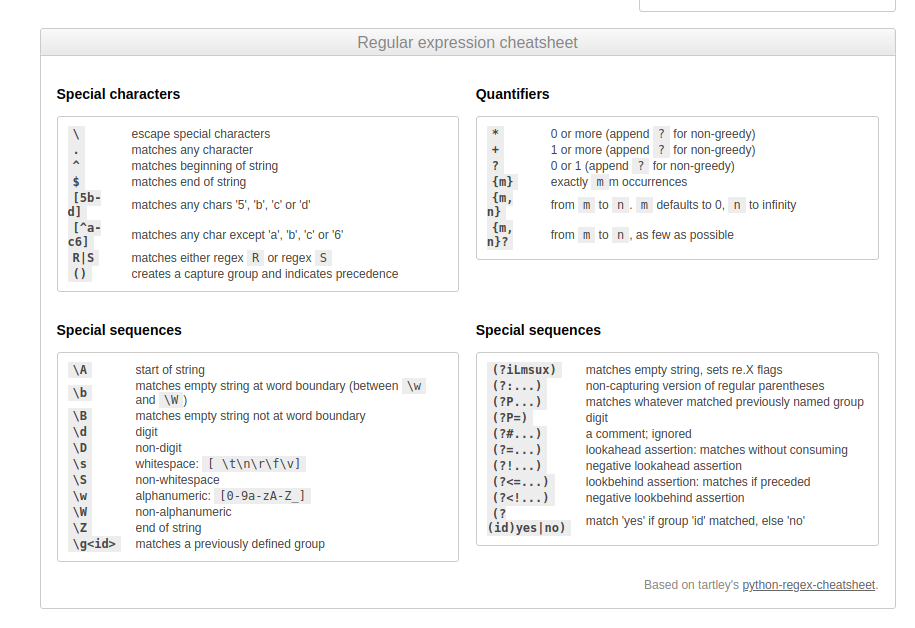

In [32]:
#Time to write the table to disk

gene_table.to_csv(f'{path_s}/genes.csv',index = False)